# IIC-2433 Minería de Datos UC

- Versiones de librerías, python 3.8.10

- numpy 1.20.3
- sklearn 1.0.2
- matplotlib 3.5.2

In [1]:
import numpy as np
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target
(n_samples, n_features), n_digits = X.shape, np.unique(y).size

### Vamos a comparar dos iniciaciones de centroides: k-means++ (grilla), y random.

In [2]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans_1 = KMeans(init="k-means++", n_clusters=n_digits, n_init=4)
kmeans_2 = KMeans(init="random", n_clusters=n_digits, n_init=4)

- n_init: Number of times the k-means algorithm is run with different centroid seeds.

### Definimos pipelines que escalan y luego ajustan kmeans al dataset

In [3]:
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline

estimator_1 = make_pipeline(MinMaxScaler(), kmeans_1).fit(X)
estimator_2 = make_pipeline(MinMaxScaler(), kmeans_2).fit(X)


### Mostramos el Silhouette score promedia de cada estimador

In [4]:
print(silhouette_score(X, estimator_1[-1].labels_, metric="euclidean",))
print(silhouette_score(X, estimator_2[-1].labels_, metric="euclidean",))

0.18236453344038736
0.18665514292116175


### Aquí hay una rutina para dibujar los Silhouette scores de cada dato para 5 valores de k. Los plots de Silhouette colorean cada cluster y muestran el score promedio para cada solución. 

Para k=  6 Silhouette score promedio:  0.147521294632982
Para k=  7 Silhouette score promedio:  0.16430771729824342
Para k=  8 Silhouette score promedio:  0.17877037871415244
Para k=  9 Silhouette score promedio:  0.18922162978846424
Para k=  10 Silhouette score promedio:  0.18428307397603894


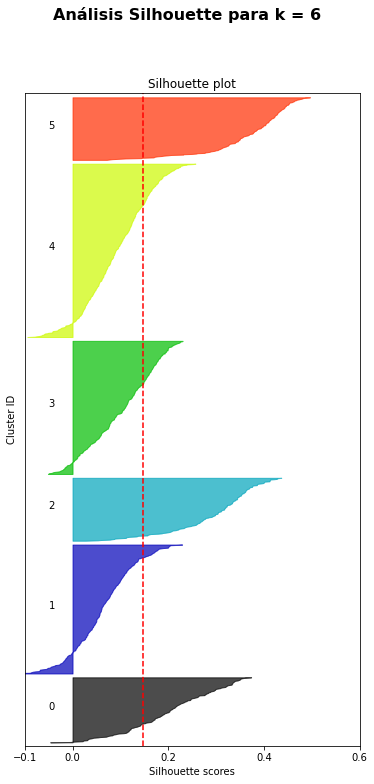

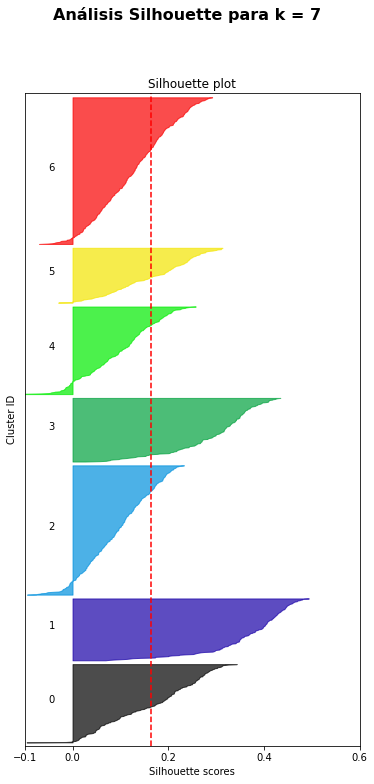

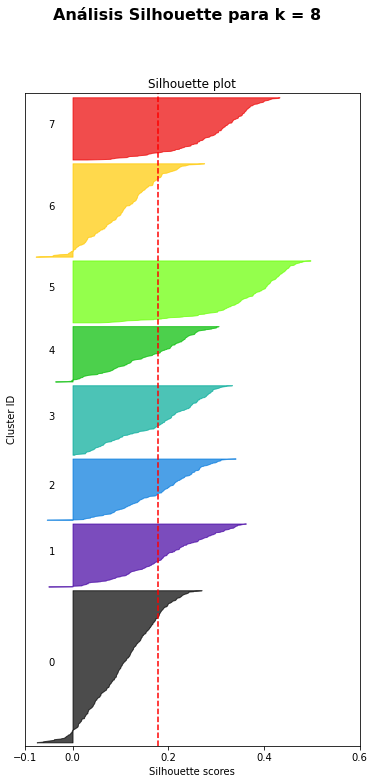

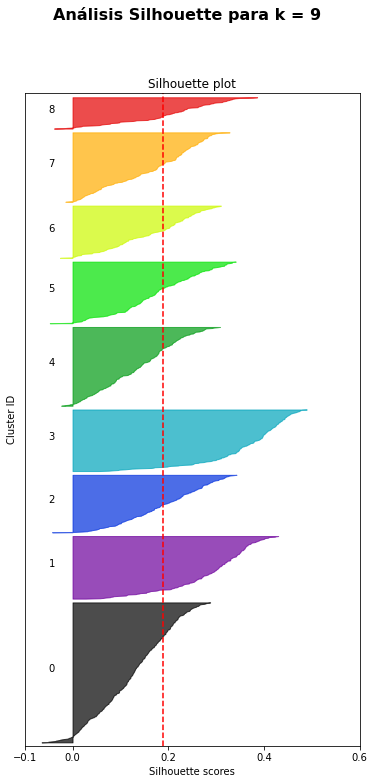

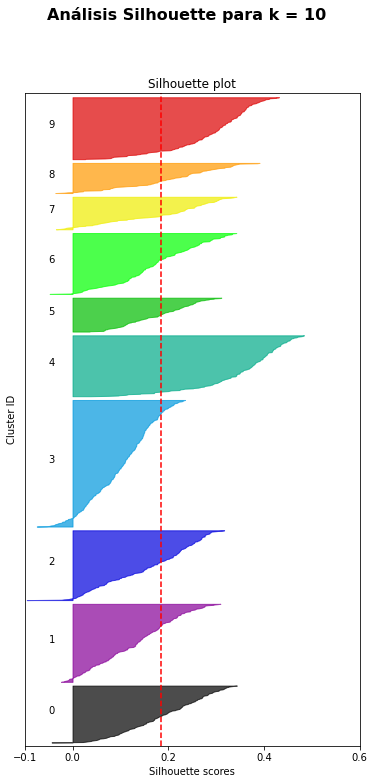

In [5]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples

range_n_clusters = [6, 7, 8, 9, 10]

for n_clusters in range_n_clusters:
    
    fig, ax = plt.subplots(figsize=(6, 12))
    

    ax.set_xlim([-0.1, 0.6])
    ax.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
    kmeans = KMeans(init="random", n_clusters=n_clusters, n_init=4)
    estimator = make_pipeline(MinMaxScaler(), kmeans).fit(X)

    cluster_labels = estimator.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "Para k= ",
        n_clusters,
        "Silhouette score promedio: ",
        silhouette_avg,
    )

    
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10 

    ax.set_title("Silhouette plot")
    ax.set_xlabel("Silhouette scores")
    ax.set_ylabel("Cluster ID")
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([]) 
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6])


    plt.suptitle(
        "Análisis Silhouette para k = %d"
        % n_clusters,
        fontsize=16,
        fontweight="bold",
    )

plt.show()